In [75]:
import pandas as pd
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [76]:
x=pd.read_csv("after.csv").drop(["Transported"],axis=1)
train=pd.read_csv("train.csv")
y=pd.read_csv("after.csv")["Transported"]
y=pd.get_dummies(y,prefix="transported")

In [77]:
y

,cabinnum_0,cabinnum_1
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
8688,1,0
8689,1,0
8690,0,1
8691,1,0


In [78]:
num_list=["Age",'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','cabinnum']
for i in num_list:
    x[i] = x[i].astype('float32')

Text(32.09374999999999, 0.5, 'variables')

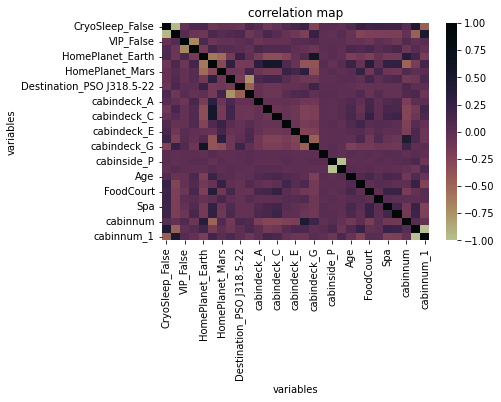

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
#cax = ax.matshow(fire.corr(), vmin=-1, vmax=1)

cmap = sns.cubehelix_palette(start = -1, rot = 1, gamma=2, as_cmap = True)

sns.heatmap(pd.concat([x,y],axis=1).corr(), vmax=1, vmin=-1, cmap=cmap)
ax.set_title('correlation map')
ax.set_xlabel('variables')
#ax.set_xticklabels([]) #设置x轴图例为空值
ax.set_ylabel("variables")

In [80]:
x=np.array(x)
y=np.array(y)

In [81]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_targets, test_targets = train_test_split(x, y)

In [82]:
from keras import models
from keras import layers
from keras import losses
from keras import metrics

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation="relu",input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(2,activation="softmax"))

    model.compile(optimizer='rmsprop',
            loss=losses.mse,
            metrics=[metrics.binary_accuracy])
    return model

In [83]:
model=build_model()
history=model.fit(train_data,train_targets,epochs=50,batch_size=32,validation_data=(test_data,test_targets))

Epoch 1/50
204/204 [==============================] - 4s 9ms/step - loss: 0.1546 - binary_accuracy: 0.7739 - val_loss: 0.1397 - val_binary_accuracy: 0.7907
Epoch 2/50
204/204 [==============================] - 1s 7ms/step - loss: 0.1361 - binary_accuracy: 0.8001 - val_loss: 0.1384 - val_binary_accuracy: 0.7976
Epoch 3/50
204/204 [==============================] - 1s 7ms/step - loss: 0.1324 - binary_accuracy: 0.8010 - val_loss: 0.1361 - val_binary_accuracy: 0.7971
Epoch 4/50
204/204 [==============================] - 1s 7ms/step - loss: 0.1294 - binary_accuracy: 0.8106 - val_loss: 0.1377 - val_binary_accuracy: 0.7953
Epoch 5/50
204/204 [==============================] - 1s 7ms/step - loss: 0.1271 - binary_accuracy: 0.8127 - val_loss: 0.1410 - val_binary_accuracy: 0.8027
Epoch 6/50
204/204 [==============================] - 1s 7ms/step - loss: 0.1265 - binary_accuracy: 0.8170 - val_loss: 0.1354 - val_binary_accuracy: 0.8031
Epoch 7/50
204/204 [==============================] - 1s 7ms/ste

In [84]:
model.predict(test_data)

array([[0.666138  , 0.33386198],
       [0.94733566, 0.05266439],
       [0.27531758, 0.72468245],
       ...,
       [0.65807515, 0.34192488],
       [0.97969496, 0.02030505],
       [0.9375574 , 0.06244262]], dtype=float32)

In [85]:
test_targets

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [0, 1],
       [1, 0],
       [1, 0]], dtype=uint8)

In [86]:
test_loss, test_acc = model.evaluate(test_data,test_targets)

68/68 [==============================] - 0s 3ms/step - loss: 0.1385 - binary_accuracy: 0.7930


In [88]:
test=pd.read_csv("testafter.csv")
result=[]
for i in model.predict(test):
    if i[0]>=0.5:
        result.append(False)
    else:
        result.append(True)
PassengerId=pd.read_csv("test.csv")["PassengerId"]

In [89]:
result=pd.DataFrame(result,columns=["Transported"])
final=pd.concat([PassengerId,result],axis=1)

In [90]:
final.to_csv("final.csv",index=0)

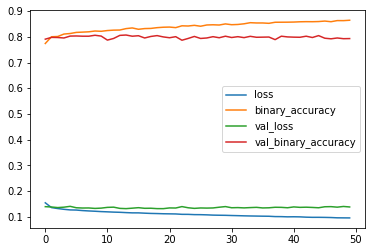

In [91]:
for i in history.history.keys():
    plt.plot(history.history[i],label=i)
    plt.legend()